<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.1-Загрузка-данных" data-toc-modified-id="1.1-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1.1 Загрузка данных</a></span></li><li><span><a href="#1.2-Подготовка-признаков" data-toc-modified-id="1.2-Подготовка-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1.2 Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#2.1-Решающее-дерево" data-toc-modified-id="2.1-Решающее-дерево-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.1 Решающее дерево</a></span></li><li><span><a href="#2.2-Случайный-лес" data-toc-modified-id="2.2-Случайный-лес-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2.2 Случайный лес</a></span></li><li><span><a href="#2.3-Логистическая-регрессия" data-toc-modified-id="2.3-Логистическая-регрессия-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2.3 Логистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#3.1-Взвешивание-классов" data-toc-modified-id="3.1-Взвешивание-классов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>3.1 Взвешивание классов</a></span></li><li><span><a href="#3.2-Upsampling-и-downsampling" data-toc-modified-id="3.2-Upsampling-и-downsampling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>3.2 Upsampling и downsampling</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

## 1.1 Загрузка данных

Подключаем библиотеки:
- `pandas` - для работы с таблицами  
- `seaborn` - для визуализации данных
- `display` - для вывода табличных данных
- `sklearn` - инструменты машинного обучения (модели классификации, метрики для исследования качества моделей, разделение данных на тренировочные, валидационные, тестовые выборки)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

Загрузим данные из файла `Churn.csv`, выведем первые 10 строк таблицы для первого взгляда на данные.  
Также с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
data = pd.read_csv(r'/datasets/Churn.csv')
# выведем первые 10 строк таблицы с помощью метода head()
display(data.head(10))
# с помощью метода info() изучим структуры таблицы: типы данных, количество строк, столбцов, пропущенных данных.
data.info()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   
5     8.0  113755.78              2          1               0   
6     7.0       0.00              2          1               1   
7     4.0  115046.74              4          1               0   
8     4.0  142051.07              2          0               1   
9     2.0  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## 1.2 Подготовка признаков

Признаки `RowNumber`, `CustomerId` и `Surname` нам не понадобятся, так как это уникальные значения которые не нужны будут нам для классификации

In [3]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


Посмотрим на распределения числовых признаков

In [4]:
def show_hists(df, data_label, num_bins, rug=False, log_scale=False):
    """
    input: data - данные для построения гистограммы
           data_label - описание данных
           num_bins - количество ячеек
    output: None
    description: Функция строит гистограмму и boxplot для выбранного параметра:
                - Плотность распределения (методом distplot() библиотеки seaborn)
                - Boxplot (метод boxplot() библиотеки seaborn)
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(df, bins=num_bins, rug=rug, ax=axes[0])
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data=data, x=data_label, ax=axes[1])
    plt.show()

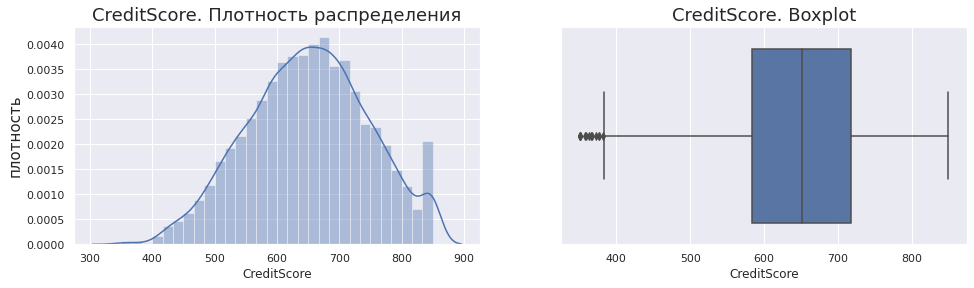

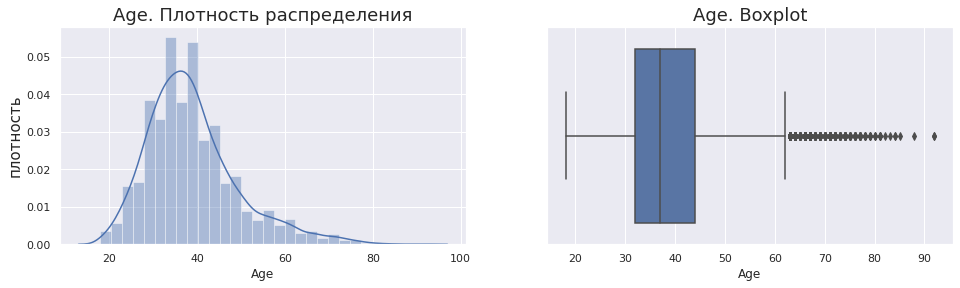

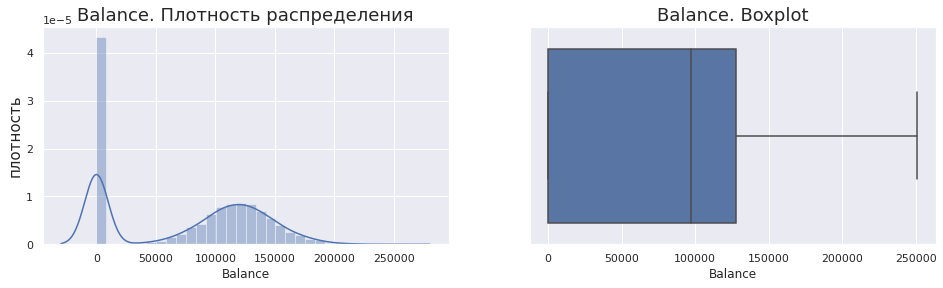

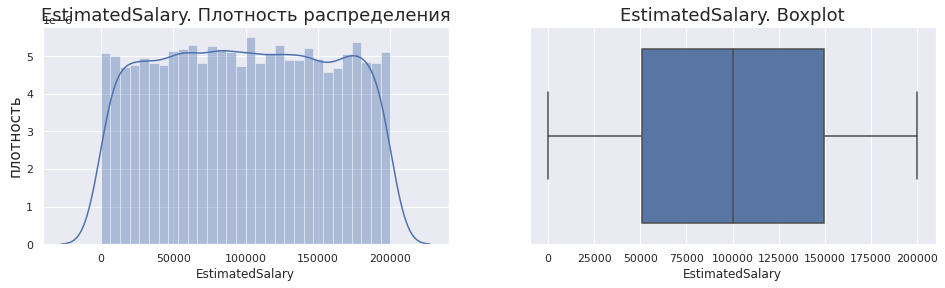

In [5]:
numerics = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for column in numerics:
    show_hists(data[column], column, num_bins=30)

- В признаках `CreditScore`, `Age` есть выбросы. Найдём их долю от общего количества данных.

In [6]:
# квантили считаем методом quantile()
# граница выбросов считается по формуле  [ q.75 + (q.75 - q.25)*1.5 ]
max_age = (data['Age'].quantile(0.75) - data['Age'].quantile(0.25))*1.5 + data['Age'].quantile(0.75)
rate = round(len(data.loc[data['Age'] > max_age]) / len(data) * 100, 2)
print('Доля выбросов в параметре {}: {} %'.format('Age', rate))

Доля выбросов в параметре Age: 3.59 %


In [7]:
# граница выбросов считается по формуле  [ q.25 - (q.75 - q.25)*1.5 ]
min_score = data['CreditScore'].quantile(0.25) - \
            (data['CreditScore'].quantile(0.75) - data['CreditScore'].quantile(0.25))*1.5
rate = round(len(data.loc[data['CreditScore'] < min_score]) / len(data) * 100, 2)
print('Доля выбросов в параметре {}: {} %'.format('CreditScore', rate))

Доля выбросов в параметре CreditScore: 0.15 %


Общая доля выбросов небольшая (меньше 4%). Не будем пока их удалять.

- К числовым признакам `CreditScore`, `Age`, `Balance`, `EstimatedSalary` применим масштабирование с помощью `StandardScaler` библиотеки `sklearn`

In [8]:
scaler = StandardScaler()
data[numerics] = scaler.fit_transform(data[numerics])

 Посмотрим на распределения категориальных признаков.

In [9]:
def show_hists(df, data_label1, data_label2=''):
    """
    input: data - данные для построения гистограммы
           data_label1,2 - названия признаков
    output: None
    description: Функция строит countplot для двух признаков
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label1 + ". CountPlot", fontsize=18)
    sns.countplot(data=df, x=data_label1, ax=axes[0])
    if data_label2 != '':
        axes[1].set_title(data_label2 + ". CountPlot", fontsize=18)
        sns.countplot(data=df, x=data_label2, ax=axes[1])
    plt.show()

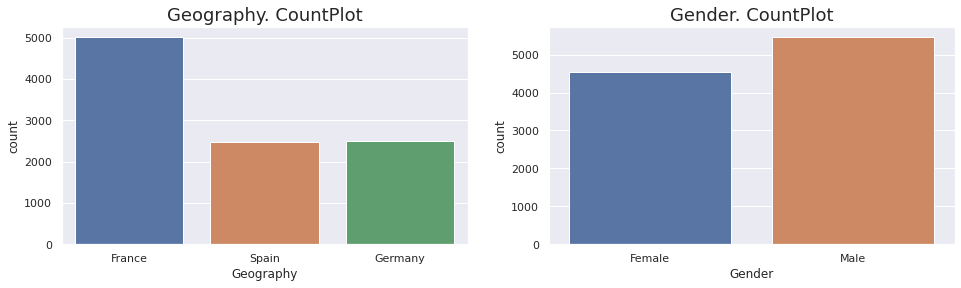

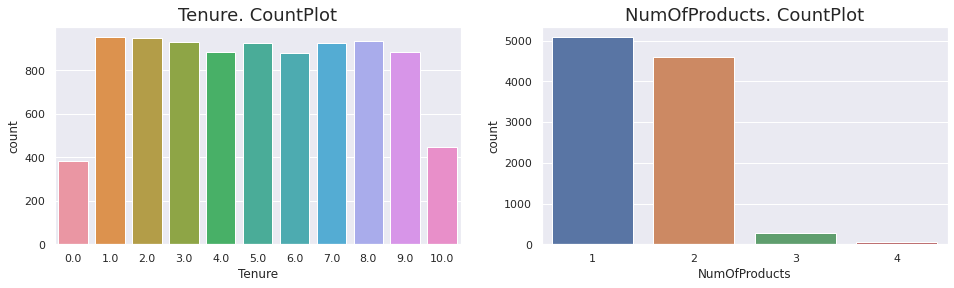

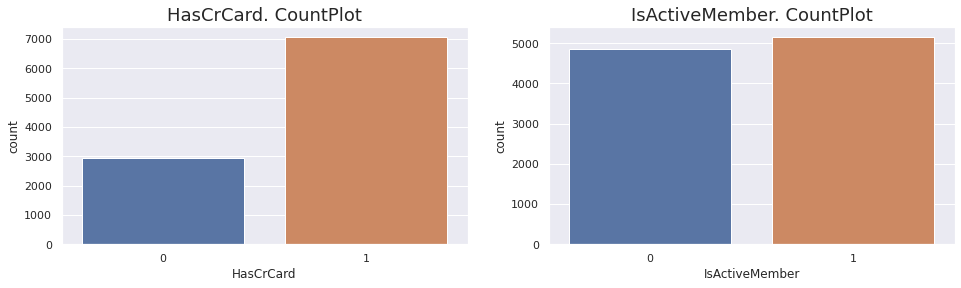

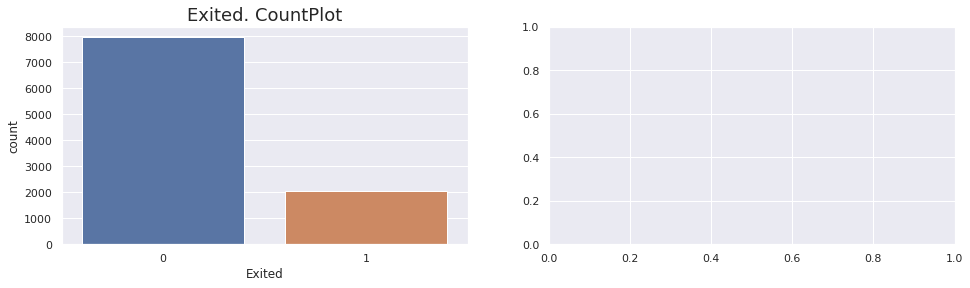

In [10]:
categoricals = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', '']
for i in range(len(categoricals)//2):
    show_hists(data, categoricals[2*i], categoricals[2*i+1])

- Целевой признак `Exited` распределён примерно 4:1.
- Количество категорий в признаках `Geography`, `Gender` небольшое. Преобразуем их методом One-Hot Encoding.

In [11]:
# для преобразования воспользуемся методом pd.get_dummies
# параметр drop_first=True для удаления избыточного столбца данных
data = pd.get_dummies(data, drop_first=True)

Преобразуем типы данных признаков `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `Exited` в `int8` для экономии места.

In [12]:
for column in ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']:
    data[column] = data[column].astype('int8')

In [13]:
display(data.head(10))

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517     2.0 -1.225848              1          1   
1    -0.440036  0.198164     1.0  0.117350              1          0   
2    -1.536794  0.293517     8.0  1.333053              3          1   
3     0.501521  0.007457     1.0 -1.225848              2          0   
4     2.063884  0.388871     2.0  0.785728              1          1   
5    -0.057205  0.484225     8.0  0.597329              2          1   
6     1.774174  1.056346     7.0 -1.225848              2          1   
7    -2.840488 -0.946079     4.0  0.618019              4          1   
8    -1.547141  0.484225     4.0  1.050820              2          0   
9     0.346319 -1.136786     2.0  0.931463              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1         0.021886       1                  0   
1               1         0.216534       0                  0   
2               0         0.240687       1                  0   
3               0        -0.108918       0                  0   
4               1        -0.365276       0                  0   
5               0         0.863650       1                  0   
6               1        -1.565487       0                  0   
7               0         0.334854       1                  1   
8               1        -0.437329       0                  0   
9               1        -0.493230       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0  
5                1            1  
6                0            1  
7                0            0  
8                0            1  
9                0            1

В графе `Tenure`, мы имеем где то 10 процентов пропусков
Преобразуем данный признак c помощью метода OHE

In [14]:

data.loc[data['Tenure'].isna(), 'Tenure'] = -1
data['Tenure'] = data['Tenure'].astype('object')
data = pd.get_dummies(data, drop_first=True)

### Выводы

- Данные успешно загружены и проверены на соответствие описанию. Дубликатов нет. Типы данных преобразованы в соответствии с хранимой информацией
- Признаки `RowNumber`, `CustomerId` и `Surname` удалены, так как целевой признак от них никак не зависит.
- Были рассмотрены распределения признаков. В `CreditScore`, `Age` найдено около 4% выбросов. Пока оставлены как есть.
- Числовые признаки приведены к стандартному виду (среднее = 0, стандартное отклонение = 1)
- Категориальные признаки преобразованы методом One-Hot Encoder.
- Целевой признак распределён в сооотношении 4:1
- В признаке `Tenure` обнаружено около 10% пропусков. Данный признак преобразован прямым кодированием One-Hot Encoder.

# 2. Исследование задачи

- Для начала разделим данные на признаки и целевой признак

In [15]:
features = data.drop('Exited', axis=1)
target = data['Exited']

- Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 соответственно (60% на обучающию и по 20% данных на валидационную и тестовую выборки).

In [16]:
# разделим  с помощью функции train_test_split библиотеки sklearn
ft_divide, features_test, target_divide, target_test = train_test_split(features, target, test_size=0.2, random_state=123)
features_train, features_valid, target_train, target_valid = train_test_split(ft_divide, target_divide, test_size=0.25, random_state=123)

In [17]:
# выведем размеры получившихся выборок
print('Размеры наборов данных:')
print('features_train: ', features_train.shape)
print('features_valid: ', features_valid.shape)
print('features_test:  ', features_test.shape)

Размеры наборов данных:
features_train:  (6000, 21)
features_valid:  (2000, 21)
features_test:   (2000, 21)


- Попробуем обучить различные классификационные модели без учёта дисбаланса классов.

## 2.1 Решающее дерево

- Инициируем модель решающего дерева DecisionTreeClassifier
- Выделим гиперпараметры для настройки модели:
    - `max_depth` - максимальная глубина древа
    - `min_samples_split` - минимальное количество объектов в узле
    - `min_samples_leaf` - минимальное количество объектов в листе
    - `criterion` ("gini" или "entropy") - функция измерения качества разделения
- Критерием проверки качества модели будет `f1` и `roc_auc`.

In [18]:
def decision_tree(features_train, features_valid, target_train, target_valid, cw=None):
    """
    input: features_train, features_valid, target_train, target_valid - обучающие и валидационные выборки признаков и целевого признака
            cw - параметр class_weight для модели решающего дерева
    output: None
    description: функция обучает модель решающего дерева DecisionTreeClassifier с различными сочетаниями гиперпараметров;
                 метрики качества модели: f1 и roc_auc;
                 функция выводит наилучшие значения метрик и значения гиперпараметров наилучшей модели.
    """
    # в параметрах best_params_f1 и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
    best_params_f1 = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_params_roc_auc = []
    best_roc_auc = 0.5
    # проходим в циклах по всем выбранным гиперпараметрам
    for max_depth in range(2,10):
        for min_samples_split in range(2,6):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    # инициация модели с текущими гиперпараметрами
                    model_dt_clf = DecisionTreeClassifier(random_state=123,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion,
                                                          class_weight=cw)
                    # обучение модели на тренировочной выборке
                    model_dt_clf.fit(features_train, target_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions = model_dt_clf.predict(features_valid)
                    # вычисление f1 модели методом f1_score
                    f1 = f1_score(target_valid, predictions)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, 
                    # сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_params_f1 = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_f1 = f1
                    # аналогично для метрики roc_auc
                    roc_auc = roc_auc_score(target_valid, predictions)
                    if roc_auc > best_roc_auc:
                        best_params_roc_auc = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_roc_auc = roc_auc
    
    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))
    
    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} '''.format(round(best_roc_auc, 3),
                                 best_params_roc_auc[0],
                                 best_params_roc_auc[1],
                                 best_params_roc_auc[2],
                                 best_params_roc_auc[3]
                                ))

In [19]:
decision_tree(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.569
    Парамтеры модели:
       max_depth = 5
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 

Наилучшая метрика roc_auc: 0.711
    Парамтеры модели:
       max_depth = 5
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 


- Наилучшая метрика f1 для решающего дерева 0.57 (не достаточно по техническому заданию).
- Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.
- Попробуем улучшить результат на других моделях

## 2.2 Случайный лес

- Инициируем модель случайного леса RandomForestClassifier
- Выделим гиперпараметры для настройки модели:
    - `n_estimators` - количество деревьев
    - `max_depth` - максимальная глубина древа
    - `min_samples_split` - минимальное количество объектов в узле
    - `min_samples_leaf` - минимальное количество объектов в листе
- Критерием проверки качества модели будет `f1` и `roc_auc`.

In [20]:
def random_forest(features_train, features_valid, target_train, target_valid, cw=None):
    """
    input: features_train, features_valid, target_train, target_valid - обучающие и валидационные выборки признаков и целевого признака
            cw - параметр class_weight для модели случайного леса
    output: None
    description: функция обучает модель решающего дерева RandomForestClassifier с различными сочетаниями гиперпараметров;
                 метрики качества модели: f1 и roc_auc;
                 функция выводит наилучшие значения метрик и значения гиперпараметров наилучшей модели.
    """
    # в параметрах best_params_f1 и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
    best_params_f1 = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_params_roc_auc = []
    best_roc_auc = 0.5
    # проходим в циклах по всем выбранным гиперпараметрам
    for n_estimators in range(30,40):
        for max_depth in range(10,17,2):
            for min_samples_split in range(2,5):
                for min_samples_leaf in range(1,4):
                    # инициация модели с текущими гиперпараметрами
                    model_rf_clf = RandomForestClassifier(random_state=123,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf)
                    # обучение модели на тренировочной выборке
                    model_rf_clf.fit(features_train, target_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions = model_rf_clf.predict(features_valid)

                    # вычисление f1 модели методом f1_score
                    f1 = f1_score(target_valid, predictions)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, 
                    # сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_params_f1 = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_f1 = f1
                    # аналогично для метрики roc_auc
                    roc_auc = roc_auc_score(target_valid, predictions)
                    if roc_auc > best_roc_auc:
                        best_params_roc_auc = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                        best_roc_auc = roc_auc

    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       n_estimators = {}
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))

    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       n_estimators = {}
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {} '''.format(round(best_roc_auc, 3),
                                 best_params_roc_auc[0],
                                 best_params_roc_auc[1],
                                 best_params_roc_auc[2],
                                 best_params_roc_auc[3]
                                ))

In [21]:
random_forest(features_train, features_valid, target_train, target_valid)

Наилучшая метрика f1: 0.575
    Парамтеры модели:
       n_estimators = 30
       max_depth = 16
       min_samples_split = 2
       min_samples_leaf = 3 

Наилучшая метрика roc_auc: 0.707
    Парамтеры модели:
       n_estimators = 30
       max_depth = 16
       min_samples_split = 2
       min_samples_leaf = 3 


- Наилучшая метрика f1 для случайного леса 0.58 (не достаточно по техническому заданию).
- Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.
- Попробуем улучшить результат на других моделях.

## 2.3 Логистическая регрессия

- Инициируем модель логистической регрессии LogisticRegression
- Выделим гиперпараметры для настройки модели:
    - `С` - инверсия силы регуляризации
- Критерием проверки качества модели будет `f1` и `roc_auc`.

In [22]:
# в параметрах best_params_f1 и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
best_params_f1 = []
best_f1 = 0
# аналогично для roc_auc метрики.
best_params_roc_auc = []
best_roc_auc = 0.5

#cs = np.linspace(0.01, 100, 1000, endpoint=True)
cs = range(1, 100)
# проходим в циклах по всем выбранным гиперпараметрам
for C in cs:
    # инициация модели с текущими гиперпараметрами
    model_lr_clf = LogisticRegression(random_state=123,
                                      C=C,
                                      max_iter=1000)
    # обучение модели на тренировочной выборке
    model_lr_clf.fit(features_train, target_train)
    # поиск предсказаний модели на валидационной выбоке
    predictions = model_lr_clf.predict(features_valid)

    # вычисление f1 модели методом f1_score
    f1 = f1_score(target_valid, predictions)
    # если текущее значение метрики f1 выше предыдущего лучшего значения, 
    # сохраняем параметры модели и текущую метрику f1
    if f1 > best_f1:
        best_params_f1 = [C]
        best_f1 = f1
    # аналогично для метрики roc_auc
    roc_auc = roc_auc_score(target_valid, predictions)
    if roc_auc > best_roc_auc:
        best_params_roc_auc = [C]
        best_roc_auc = roc_auc

In [23]:
# вывод наилучшей метрики f1 и параметров модели.
print('''Наилучшая метрика f1: {}
Парамтеры модели:
   C = {} '''.format(round(best_f1, 3),
                             best_params_f1[0]
                            ))

Наилучшая метрика f1: 0.279
Парамтеры модели:
   C = 5 


In [24]:
# вывод наилучшей метрики roc_auc и параметров модели.
print('''Наилучшая метрика roc_auc: {}
Парамтеры модели:
   C = {} '''.format(round(best_roc_auc, 3),
                             best_params_roc_auc[0]
                            ))

Наилучшая метрика roc_auc: 0.574
Парамтеры модели:
   C = 5 


- Наилучшая метрика f1 для логистической регрессии 0.27 (хуже, чем на остальных моделях).
- Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.
- Попробуем улучшить результат, разобравшись с дисбалансом классов.

### Выводы

- Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно
- Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов. Максимальное значение метрики **f1 = 0.58** получено при обучении модели случайного леса. Качество модели не удовлетворяет условию технического задания.
- Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики **roc_auc = 0.71** достигнуто при обучении модели случайного леса. 
- Метрики f1 и roc_auc достигли максимальных значений при одинаковых настройках гиперпараметров (но такой результат получается не всегда).

# 3. Борьба с дисбалансом

- Соотношение значений целевого признака 4:1 (для классов 0 и 1 соответственно)
- Для борьбы с дисбалансом классов попробуем:
    - взвешивание классов (class_weight='balanced')
    - увеличение выборки положительного класса (копирование объектов)
    - уменьшение выборки отрицательного класса (sampling)
    - перемешивание объектов методом shuffle

## 3.1 Взвешивание классов

In [25]:
def decision_tree(features_train, features_valid, target_train, target_valid, cw=None):
    """
    input: features_train, features_valid, target_train, target_valid - обучающие и валидационные выборки признаков и целевого признака
            cw - параметр class_weight для модели решающего дерева
    output: None
    description: функция обучает модель решающего дерева DecisionTreeClassifier с различными сочетаниями гиперпараметров;
                 метрики качества модели: f1 и roc_auc;
                 функция выводит наилучшие значения метрик и значения гиперпараметров наилучшей модели.
    """
    # в параметрах best_params_f1 и best_f1 будем хранить наилучшие параметры для модели и наивысшую f1 метрику соответственно
    best_params_f1 = []
    best_f1 = 0
    # аналогично для roc_auc метрики.
    best_params_roc_auc = []
    best_roc_auc = 0.5
    # проходим в циклах по всем выбранным гиперпараметрам
    for max_depth in range(2,10):
        for min_samples_split in range(2,6):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:
                    # инициация модели с текущими гиперпараметрами
                    model_dt_clf = DecisionTreeClassifier(random_state=123,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion,
                                                          class_weight=cw)
                    # обучение модели на тренировочной выборке
                    model_dt_clf.fit(features_train, target_train)
                    # поиск предсказаний модели на валидационной выбоке
                    predictions = model_dt_clf.predict(features_valid)
                    # вычисление f1 модели методом f1_score
                    f1 = f1_score(target_valid, predictions)
                    # если текущее значение метрики f1 выше предыдущего лучшего значения, 
                    # сохраняем параметры модели и текущую метрику f1
                    if f1 > best_f1:
                        best_params_f1 = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_f1 = f1
                    # аналогично для метрики roc_auc
                    roc_auc = roc_auc_score(target_valid, predictions)
                    if roc_auc > best_roc_auc:
                        best_params_roc_auc = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_roc_auc = roc_auc
    
    # вывод наилучшей метрики f1 и параметров модели.
    print('''Наилучшая метрика f1: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))
    
    # вывод наилучшей метрики roc_auc и параметров модели.
    print('''Наилучшая метрика roc_auc: {}
    Парамтеры модели:
       max_depth = {}
       min_samples_split = {}
       min_samples_leaf = {}
       criterion = {} '''.format(round(best_roc_auc, 3),
                                 best_params_roc_auc[0],
                                 best_params_roc_auc[1],
                                 best_params_roc_auc[2],
                                 best_params_roc_auc[3]
                                ))

In [26]:
decision_tree(features_train, features_valid, target_train, target_valid, cw='balanced')

Наилучшая метрика f1: 0.565
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 9
       criterion = gini 

Наилучшая метрика roc_auc: 0.751
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 8
       criterion = gini 


- Взвешивание классов почти не дало прироста в метрике f1 на решающем дереве. 
- Отметим, что в данном случае наилучшие значения метрик f1 и roc_auc достигаются при различных настройках гиперпараметров.
- Применим upsampling и downsampling. Проверим результаты на модели случайного леса (она дала наилучший результат при начальном исследовании)

## 3.2 Upsampling и downsampling

- Напишем функции для увеличения и уменьшения выборок.

In [27]:
def upsample(features, target, repeat):
    """
    input:        features - признаки 
                  target - целево признак
                  repeat (int) - множитель для повторения признаков
    output:       features_upsampled - увеличенная выборка признаков
                  target_upsampled - увеличенная выборка целевого признака
    description:  функция разделяет признаки по классам целевого признака (0, 1),
                  повторяет признаки целевого положительного класса repeat раз,
                  объединяет объекты с разными целевыми признаками методом concat,
                  перемешивает объекты методом shuffle
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [28]:
def downsample(features, target, fraction):
    """
    input:        features - признаки 
                  target - целево признак
                  fraction (float) - доля объектов для сэмплирования
    output:       features_downsampled - уменьшенная выборка признаков
                  target_downsampled - уменьшенная выборка целевого признака
    description:  функция разделяет признаки по классам целевого признака (0, 1), 
                  сэмплирует признаки целевого класса 0 (с коэффициентом fraction),
                  объединяет объекты с разными целевыми признаками методом concat,
                  перемешивает объекты методом shuffle
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

- Для обучающей выборки увеличим количество объектов класса 1 в 2 раза, уменьшим количество объектов класса 0 в 1.5 раза.

In [29]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 2)
features_train_balanced, target_train_balanced = downsample(features_train_upsampled, target_train_upsampled, 0.75)

- Обучим модели случайного леса и решающего дерева на сбалансированных обучающих выборках.

In [30]:
random_forest(features_train_balanced, features_valid, target_train_balanced, target_valid)

Наилучшая метрика f1: 0.608
    Парамтеры модели:
       n_estimators = 33
       max_depth = 12
       min_samples_split = 3
       min_samples_leaf = 1 

Наилучшая метрика roc_auc: 0.748
    Парамтеры модели:
       n_estimators = 33
       max_depth = 12
       min_samples_split = 3
       min_samples_leaf = 1 


In [31]:
decision_tree(features_train_balanced, features_valid, target_train_balanced, target_valid)

Наилучшая метрика f1: 0.587
    Парамтеры модели:
       max_depth = 7
       min_samples_split = 2
       min_samples_leaf = 2
       criterion = gini 

Наилучшая метрика roc_auc: 0.75
    Парамтеры модели:
       max_depth = 6
       min_samples_split = 2
       min_samples_leaf = 1
       criterion = gini 


- Метрика f1 для модели "Случайный лес" достигла значения **0.61** на сбалансированной выборке, что удовлетворяет условию технического задания (>0.59).
- Для модели "Решающее дерево" метрика f1 также практически достигла минимально допустимого значения 0.59 (за меньшее время обучения).
- Наилучшие значения метрик f1 и roc_auc достигли на случайном лесе при одинаковых значениях гиперпараметров. Для решающего дерева оптимальные значения гиперпараметров различаются.
- Стоит отметить, что максимальное значение метрики roc_auc для решающего дерева **0.75** немного выше, чем для случайного леса **0.748**.

- Для модели случайного леса попробуем применить различные варианты upsampling и downsampling (изменять параметры repeat и fraction).

In [32]:
for rep in range(2,4):
    for frac in np.arange(0.5, 0.8, 0.05):
        print('=============================================================')
        print('repeat = {};   fraction = {}'.format(rep, round(frac,2)))
        features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, rep)
        features_train_balanced, target_train_balanced = downsample(features_train_upsampled, target_train_upsampled, frac)
        decision_tree(features_train_balanced, features_valid, target_train_balanced, target_valid)

repeat = 2;   fraction = 0.5
Наилучшая метрика f1: 0.576
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 3
       criterion = gini 

Наилучшая метрика roc_auc: 0.757
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 6
       criterion = gini 
repeat = 2;   fraction = 0.55
Наилучшая метрика f1: 0.604
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 

Наилучшая метрика roc_auc: 0.769
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 4
       criterion = gini 
repeat = 2;   fraction = 0.6
Наилучшая метрика f1: 0.582
    Парамтеры модели:
       max_depth = 8
       min_samples_split = 2
       min_samples_leaf = 7
       criterion = entropy 

Наилучшая метрика roc_auc: 0.758
    Парамтеры модели:
       max_depth = 7
       min_samples_split = 5
       min_samples_leaf = 

- Наилучший результат для решающего дерева достигнут при увеличении положительного класса тренировочной выборки в 2 раза и сэмплировании отрицательного класса с коэффициентом 0.55. При этом метрика **f1 = 0.604** а **roc_auc = 0.769**, что удовлетворяет условиям технического задания.

### Выводы

- Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики f1.
- Upsampling положительного класса и downsampling отрицательного класса дали необходимый прирост точности моделей. 
- Необходимое качество на валидационной выборке получили модели:
    - Случайный лес:
        - f1 = 0.608
        - roc_auc = 0.748
        - repeat = 2         - повторение объектов класса 1
        - fraction = 0.75    - коэффициент сэмплирования объектов класса 0
    - Решающее дерево:
        - f1 = 0.604
        - roc_auc = 0.769
        - repeat = 2
        - fraction = 0.55

# 4. Тестирование модели

- Проведём обучение полученных моделей на всех доступных данных (обучающие + валидационные), предварительно сбалансировав классы с найденными ранее коэффициентами repeat и fraction. 
- Вычислим метрики f1 и roc_auc на тестовой выборке.

**1) Модель "Случайный лес"**

In [33]:
features_upsampled, targetupsampled = upsample(features, target, 2)
features_balanced, targetbalanced = downsample(features_upsampled, targetupsampled, 0.75)
model_rfc_final = RandomForestClassifier(random_state=123,
                                         n_estimators=33,
                                         max_depth=12,
                                         min_samples_split=3,
                                         min_samples_leaf=1)
model_rfc_final.fit(features_balanced, targetbalanced)
predictions = model_rfc_final.predict(features_test)
f1 = f1_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, predictions)
print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.8, 
 roc_auc = 0.88


**2) Модель "Решающее дерево"**

In [34]:
features_upsampled, targetupsampled = upsample(features, target, 2)
features_balanced, targetbalanced = downsample(features_upsampled, targetupsampled, 0.55)
model_dtc_final = DecisionTreeClassifier(random_state=123,
                                         max_depth=8,
                                         min_samples_split=2,
                                         min_samples_leaf=4)
model_dtc_final.fit(features_balanced, targetbalanced)
predictions = model_dtc_final.predict(features_test)
f1 = f1_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, predictions)
print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.65, 
 roc_auc = 0.81


### Выводы

- Удовлетворяющее техническому заданию значение метрики f1 (на тестовой выборке) удалось получить на двух моделях:
    - Случайный лес
        f1 = 0.8
        roc_auc = 0.88
    - Решающее дерево
        f1 = 0.65
        roc_auc = 0.81
- При этом метрика f1 выше у модели Случайный лес, а roc_auc выше у Решающего дерева.

**1) Модель "Случайный лес"**

In [40]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 2)
features_train_balanced, target_train_balanced = downsample(features_train_upsampled, target_train_upsampled, 0.75)
model_rfc_final = RandomForestClassifier(random_state=123,
                                         n_estimators=33,
                                         max_depth=12,
                                         min_samples_split=3,
                                         min_samples_leaf=1)
model_rfc_final.fit(features_train_balanced, target_train_balanced)
predictions = model_rfc_final.predict(features_test)
f1 = f1_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, predictions)
print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.63, 
 roc_auc = 0.76


**2) Модель "Решающее дерево"**

In [36]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 2)
features_train_balanced, target_train_balanced = downsample(features_train_upsampled, target_train_upsampled, 0.55)
model_dtc_final = DecisionTreeClassifier(random_state=123,
                                         max_depth=8,
                                         min_samples_split=2,
                                         min_samples_leaf=4)
model_dtc_final.fit(features_train_balanced, target_train_balanced)
predictions = model_dtc_final.predict(features_test)
f1 = f1_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, predictions)
print(' f1 = {}, \n roc_auc = {}'.format(round(f1,2), round(roc_auc,2)))

 f1 = 0.62, 
 roc_auc = 0.78


# 5. Общий вывод

- Произведена предобработка данных. 
    - Числовые признаки приведены к стандартному виду (среднее = 0, стандартное отклонение = 1). Категориальные признаки преобразованы методом One-Hot Encoder.
    - Целевой признак распределён в сооотношении **4:1**
    - В признаке `Tenure` обнаружено около 10% пропусков. Попытка построить классификационную модель для заполнения пропусков не принесла существенных результатов (качество модели 12%, при случайном заполнении 9%). Данный признак преобразован прямым кодированием One-Hot Encoder.
- Проведён анализ моделей без учёта дисбаланса классов.
    - Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно
    - Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов. Максимальное значение метрики **f1 = 0.58** получено при обучении модели случайного леса.
    - Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики **roc_auc = 0.71** достигнуто при обучении модели случайного леса. 
    - Метрики f1 и roc_auc достигли максимальных значений при одинаковых настройках гиперпараметров.
- Проведён анализ дисбаланса классов
    - Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики f1.
    - Upsampling положительного класса и downsampling отрицательного класса дали необходимый прирост точности моделей. 
    - Необходимое значение **f1 на валидационной выборке** получили модели:
        - **Случайный лес**:
            - **f1 = 0.608**
            - **roc_auc = 0.748**
        - **Решающее дерево**:
            - **f1 = 0.604**
            - **roc_auc = 0.769**
- Проведено тестирование полученных моделей на тестовой выборке:
    - Значение метрики **f1 на тестовой выборке**:
        - **Случайный лес**:
            - **f1 = 0.8**
            - **roc_auc = 0.88**
        - **Решающее дерево**:
            - **f1 = 0.65**
            - **roc_auc = 0.81**
    - Оба показателя выше у случайного леса